In [4]:
import pennylane as qml
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
from pennylane import numpy as np

import matplotlib.pyplot as plt

In [5]:
np.random.seed(32)

### Data Load

In [7]:
data = np.load('uquark.npz') 

In [8]:
xdata = data['x']
true_data = data['y']
len(xdata)

100

In [11]:
# ????
q_data = np.random.uniform(size = 100, requires_grad = False)
print(len(q_data))

100


### PDF Ansatz Model

In [16]:
dev = qml.device("lightning.qubit", wires = 10)

@qml.qnode(dev)
def PDF_Ansatz(params, q, x, num_layers):
    
    idx = 0

    for _ in range(num_layers):
        qml.RY(params[idx]*q+params[idx+1], wires = 0, id = 'q')
        qml.RZ(params[idx+2]*np.log10(x)+params[idx+3], wires = 0, id = 'log x')
        qml.RY(params[idx+4]*x+params[idx+5], wires = 0, id = 'x')
        idx += 6

    return qml.expval(qml.PauliZ(0))


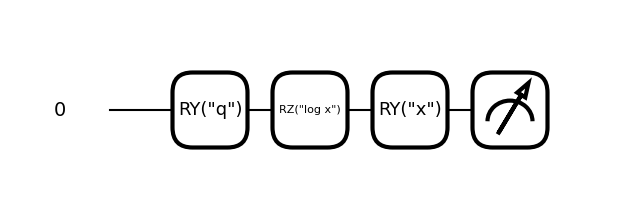

In [17]:
num_layers = 1
params = np.random.uniform(size = num_layers * 6, requires_grad = True)

fig, ax = qml.draw_mpl(PDF_Ansatz)(params, q_data, xdata, num_layers)
plt.show()